# Spam Email Detection using Logistic Regression

## Mini Project

**Objective:** Build a Logistic Regression model to classify emails as Spam or Not Spam.

## 1. Data Collection and Loading

#### Data Source:
DataSet Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

downloding stopwords from nltk

In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Loading
    replacing "ham" : 0 "spam" : 1

In [3]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data = data[['v1', 'v2']]
data = data.rename(columns={'v1': 'label', 'v2': 'text'})
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
data['text'] = data['text'].apply(lambda x: x.replace('\n', ' '))

In [5]:
df = pd.DataFrame(data)
df.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


    checking any present null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


## 2. Text Preprocessing

In [ ]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)


Converting Text data into Matrix tockens

## 3. TF-IDF Vectorization

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
y = df.label


## 4. Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5. Model Development
fitting LogisticRegression Model

In [10]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = clf.predict(X_test)


## 6. Model Evaluation

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [13]:
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.9814593301435407
Precision: 0.9898477157360406
Recall   : 0.8705357142857143
F1 Score : 0.9263657957244655


### Confusion Matrix


Confusion Matrix:
[[1446    2]
 [  29  195]]


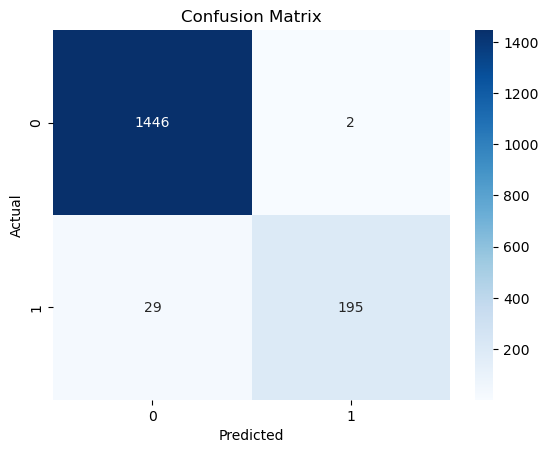

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 7. Model Interpretation

In [15]:
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]

top_spam = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False).head(10)

top_spam

,Feature,Coefficient
7277,txt,2.115126
6220,servic,1.944554
4752,mobil,1.722114
5991,rington,1.635924
1776,call,1.610218
4957,new,1.608954
1916,chat,1.589639
5929,repli,1.583022
2006,claim,1.484025
6961,text,1.468183


#### Classification Report

In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.87      0.93       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## 8. Report & Insights

- Logistic Regression achieved high accuracy and F1-score.
- TF-IDF with bigrams improved spam phrase detection.
- Future work: Try Naive Bayes, SVM, or Deep Learning models.


## 9. Saving the model

### Saving model under name model_pickel

In [ ]:
import pickle
with open('model_pickel','wb') as f:
    pickle.dump(clf,f)

In [20]:
with open('model_pickel','rb') as f:
    mp = pickle.load(f)

### Saving model under name model_joblib

In [36]:
import joblib
joblib.dump(clf,'model_joblib')
mp1 = joblib.load('model_joblib')